# Support Vector Machine – Cancer Data

## Project Description:
This project applies Support Vector Machine (SVM) techniques to a breast cancer dataset from Kaggle in order to classify tumors as malignant or benign. The work involved both implementing SVMs from scratch (with L2 regularization, C-parameterization, epochs, and batch sizes) and using scikit-learn’s SVC for comparison. Extensive data exploration, visualization, and evaluation of multiple performance metrics (accuracy, precision, recall, F1, ROC AUC) were performed to assess and refine model performance.

### Objectives:
* Import, clean, and explore a publicly available cancer dataset from Kaggle.
* Visualize data distributions, relationships, and correlations between features.
* Implement SVM with hinge loss, L2 regularization, epochs, and mini-batch gradient descent from scratch.
* Compare different formulations: L2 regularization vs. C-parameterization.
* Evaluate performance across metrics including precision, recall, F1, and ROC AUC.
* Apply scikit-learn’s SVC with pipelines, cross-validation, and GridSearchCV for hyperparameter tuning.
* Compare custom implementations against library implementations to validate correctness and generalization.


### Public dataset source:
[Kaggle Cancer Data Data Set](https://www.kaggle.com/datasets/erdemtaha/cancer-data)
This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

In [62]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, recall_score, roc_auc_score, f1_score, ConfusionMatrixDisplay

## Data Exploration

In [2]:
# Establish file path and import data
path = 'cancer_data.csv'
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Data Visualization

Text(0.5, 0, 'Malignant or Benign')

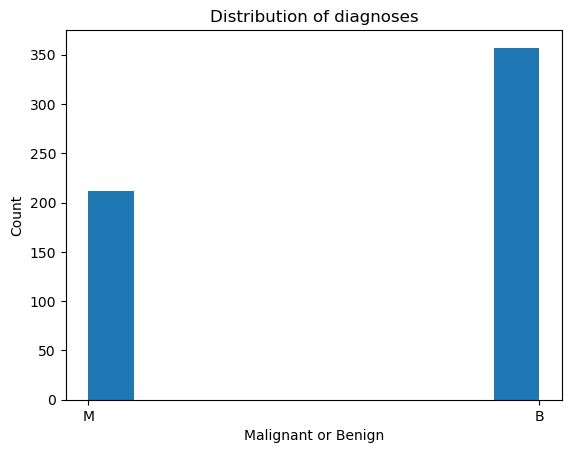

In [66]:
plt.hist(df['diagnosis'])
plt.title("Distribution of diagnoses")
plt.ylabel('Count')
plt.xlabel('Malignant or Benign')

In [5]:
# View pairplots
px.scatter_matrix(df, dimensions=["radius_mean", "texture_mean", "perimeter_mean","area_mean",'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean'])


In [6]:
# View correlation matrix
df.corr(numeric_only = True)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


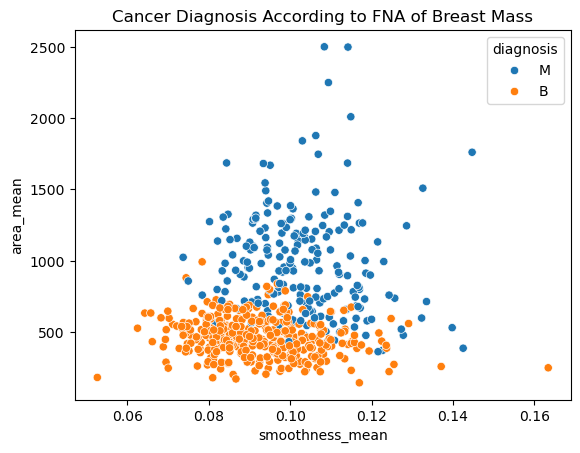

In [21]:
sns.scatterplot(
    data=df,
    x='smoothness_mean',
    y='area_mean',
    hue='diagnosis'
)
plt.title('Cancer Diagnosis According to FNA of Breast Mass')
plt.show()

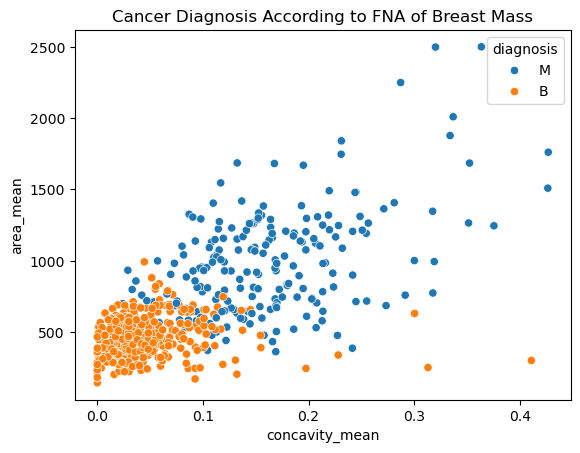

In [26]:
sns.scatterplot(
    data=df,
    x='concavity_mean',
    y='area_mean',
    hue='diagnosis'
)
plt.title('Cancer Diagnosis According to FNA of Breast Mass')
plt.show()

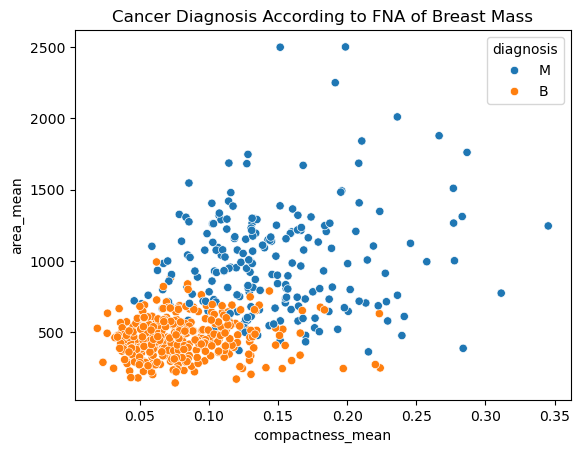

In [27]:
sns.scatterplot(
    data=df,
    x='compactness_mean',
    y='area_mean',
    hue='diagnosis'
)
plt.title('Cancer Diagnosis According to FNA of Breast Mass')
plt.show()

## Model Development

In [10]:
# Relationship looks quadratic, so a polynomial degree of 2
X = df[['concavity_mean','area_mean']] # Input
# Encode diagnosis variable to have outcomes of -1 or 1
df['diagnosis_encoded'] = df['diagnosis'].map({'B': -1, 'M': 1})
y = df['diagnosis_encoded'] # Target

In [61]:
def svm_fit (X, y_true, lambda_param=0.01, n_iters=1000, learning_rate=0.01):
    # Initialize parameters
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses =[]

    # Fit dataset to SVM classifier
    for i in range(n_iters):
        yi = y_true[i]
        xi = X[i]
        margin = yi * (w @ xi + b)
        # Gradient descent
        # L2 regularization
        if margin >= 1:
            grad_w = 2 * lambda_param * w
            grad_b = 0
        else:
            grad_w = 2 * lambda_param * w - yi * xi
            grad_b = yi
        
        # Update the parameters
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        # Compute loss
        margins = y_true * (X @ w + b)
        hinge_losses = np.maximum(0, 1 - margins)
        # loss = 0.5 * np.dot(w, w) + C * np.sum(hinge_losses)
        loss = lambda_param * np.dot(w,w) + np.mean(hinge_losses)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {losses[-1]:.4f}")

    return w, b, losses

In [86]:
def svm_pred(X,y,w,b,lambda_param):
    # Prediction
    scores = X @ w + b
    y_pred = np.sign(scores)

    # Hinge loss
    margins = y * scores
    hinge_losses = np.maximum(0, 1 - margins)

    # Objective
    test_loss = lambda_param * np.dot(w,w) + np.mean(hinge_losses)
    return test_loss, y_pred

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalize X: Z-score
# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Re-index y sets after splitting
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape
# Pretty small dataset, number of iterations will be less than 1000 in training

(455, 2)

In [76]:
w, b, losses = svm_fit(X_train_scaled, y_train, lambda_param=0.01, n_iters=455, learning_rate=0.001)

Iteration 0: Loss = 1.0014
Iteration 100: Loss = 0.9249
Iteration 200: Loss = 0.8567
Iteration 300: Loss = 0.7779
Iteration 400: Loss = 0.7081


In [87]:
pred_test_loss, y_pred = svm_pred(X_test_scaled, y_test, w, b, lambda_param=0.01)
print(f"Test loss: {pred_test_loss:.4f}")

Test loss: 0.6602


## Model Evaluation

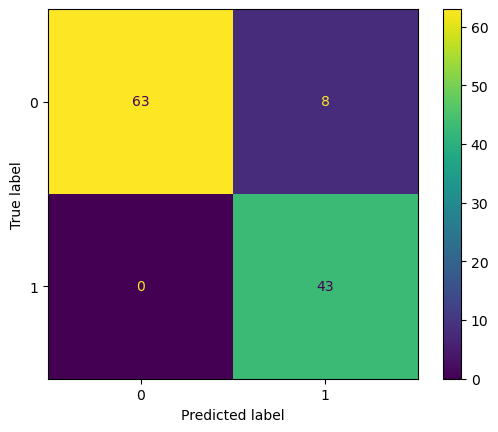

In [96]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall}")

True Negatives (TN): 63
False Positives (FP): 8
False Negatives (FN): 0
True Positives (TP): 43
Precision: 0.843
Recall: 1.0


In [103]:
f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1:.3f}")

F1 Score: 0.915


The recall score indicates that all malignant cases were caught, whih is important for cancer detection. Of the cases that were predicted as malignant, about 16% were actually benign, which seems to be an acceptable trade-off for high recall. The F1 is quite high,however, this is a very small data set. Let's check for overfitting.

In [68]:
y_pred_train = np.sign(X_train_scaled @ w + b)
f1 = f1_score(y_train,y_pred_train)
print(f"F1 Score: {f1:.3f}")

# For ROC AUC, use the raw scores (distance from hyperplane)
y_scores_train = X_train_scaled @ w + b
roc_auc_train = roc_auc_score(y_train, y_scores_train)
print(f"ROC AUC Score: {roc_auc:.3f}")

F1 Score: 0.874
ROC AUC Score: 0.942


The training performance is not higher than the testing performance, which implies no overfitting.

## C-parametrized model version vs L2 regularization

L2 Regularization encourages the model to learn smaller, more evenly distributed weights, reducing the impact of any single feature and preventing reliance on features that might just be noise in the training data. While C parametrization controls the trade-off between maximizing the margin (the distance between the separating hyperplane and the closest data points) and minimizing classification errors on the training data. This method does not perform feature selection directly and it is more common for SVM's.

In [123]:
def svm_C2fit (X, y_true, C = 1.0, n_iters=1000, learning_rate=0.001):
    # Initialize parameters
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses =[]

    # Fit dataset to SVM classifier
    for i in range(n_iters):
        yi = y_true[i]
        xi = X[i]
        margin = yi * (w @ xi + b)
        # Gradient descent
        if margin >= 1:
            grad_w = w
            grad_b = 0
        else:
            grad_w = w - C * yi * xi
            grad_b = -C * yi
        
        # Update the parameters
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        # Compute loss
        margins = y_true * (X @ w + b)
        hinge_losses = np.maximum(0, 1 - margins)
        loss = 0.5 * np.dot(w, w) + C * np.sum(hinge_losses)
        mean_hinge = hinge_losses.mean()
        losses.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}: hinge loss sum = {losses[-1]:.4f} | hinge loss mean = {mean_hinge:.4f}")

    return w, b, losses

In [129]:
w, b, losses = svm_C2fit(X_train_scaled, y_train, C=1, n_iters=455, learning_rate=0.001)

Iteration 0: hinge loss sum = 455.3830 | hinge loss mean = 1.0008
Iteration 100: hinge loss sum = 414.5040 | hinge loss mean = 0.9110
Iteration 200: hinge loss sum = 380.8816 | hinge loss mean = 0.8371
Iteration 300: hinge loss sum = 342.5799 | hinge loss mean = 0.7529
Iteration 400: hinge loss sum = 316.8039 | hinge loss mean = 0.6962


The mean loss is decreasing steadily, but has not converged. Especially given that this is a small dataset, having multiple passes (i.e., epochs) and shuffling the examples before calculating loss can help to fully converge. However, the performance with this model (C-parametrization) is pretty comparable to that of L2 regularization when comparing the mean hinge loss alone.

## Epochs and Batch Sizes

In [14]:
def svm_fit (X, y_true, lambda_param=0.01, epochs=10, batch_size=32, learning_rate=0.01):
    """
    Fead in X and y_true (normalized) data for training of the model
    lamba_param: regularization strength
    epochs: how many passes through the dataset
    batch_size: number of samples per gradient descent update
    learning_rate: step size for gradient descent
    """
    # Initialize parameters
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses =[]

    for epoch in range(epochs): # Each epoch is one pass through the dataset
        # Shuffle dataset at the start of each epoch
        indices = np.arange(n_samples) # Make array of row indices
        np.random.shuffle(indices) # Randomly shuffle the indices
        X = X[indices] # Reassign the shuffled indices to the data
        y_true = y_true[indices]

        # Mini batch loop
        for start in range(0, n_samples, batch_size): # Slice dataset into chinks of size batch size. aka how many updates per epoch
            end = start + batch_size # Find the start and end points for each epoch update
            X_batch = X[start:end]
            y_batch = y_true[start:end]

            # Compute svm margins
            margins = y_batch * (X_batch @ w + b) # If the margin >=1 then point is correct, so the loss is 0
            condition = margins < 1 # If margin <1 then sample contributes to gradient, will want to only keep TRUE conditions 
            
            # Gradient descent
            # L2 regularization and hinge loss, which only depends on samples where margin<1
            grad_w = 2 * lambda_param * w - np.mean((condition * y_batch)[:, None] * X_batch, axis=0)
                # Subtracting contributions from misclassified or low-margin points
            grad_b = -np.mean(condition * y_batch)
            
            # Update parameters
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b

        # Compute loss
        margins = y_true * (X @ w + b)
        hinge_losses = np.maximum(0, 1 - margins)
        loss = lambda_param * np.dot(w,w) + np.mean(hinge_losses)
        losses.append(loss)

        print(f"Epoch {epoch+1}/{epochs}: Loss = {loss:.4f}")

    return w, b, losses


In [23]:
def svm_predict(X, y_test, w, b, lambda_param=0.1):
    """ Labels for classes as {-1, +1}
    L2 regularized hinge loss
    """
    scores = X @ w + b
    y_pred = np.where(scores >= 0, 1, -1) # Avoids 0 edge case

    margins = y_test * scores
    hinge = np.maximum(0, 1 - margins)
    loss = lambda_param * np.dot(w,w) + hinge.mean()
    return y_pred, scores, loss


In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Re-index y sets after splitting
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Fit the data
w, b, losses = svm_fit(X_train_scaled, y_train, lambda_param=0.01, batch_size=32, epochs=10, learning_rate=0.1)

# Make predictions
y_pred, scores, loss = svm_predict(X_test_scaled, y_test, w, b, lambda_param=0.01)
print(f"Test loss: {loss:.4f}")


Epoch 1/10: Loss = 0.3036
Epoch 2/10: Loss = 0.2718
Epoch 3/10: Loss = 0.2655
Epoch 4/10: Loss = 0.2611
Epoch 5/10: Loss = 0.2591
Epoch 6/10: Loss = 0.2580
Epoch 7/10: Loss = 0.2573
Epoch 8/10: Loss = 0.2568
Epoch 9/10: Loss = 0.2564
Epoch 10/10: Loss = 0.2561
Test loss: 0.1938


By incorporating mini-batches for gradient descent and epochs for iterating over the entire dataset, this significantly improved the hinge loss of the model. The training loss drops quickly and then plateaus (stable convergence) and the test loss is less than the training loss (no overfitting). Let's re-evaluate the model with some more metrics.

In [69]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall}")

f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1:.3f}")

True Negatives (TN): 71
False Positives (FP): 0
False Negatives (FN): 5
True Positives (TP): 38
Precision: 1.000
Recall: 0.8837209302325582
F1 Score: 0.938


Improved performance with precision and F1 score compared to model with batch gradient descent and no epochs. Similar performance for ROC AUC score and slightly worse recall.

Is the dataset imbalanced? How many diagnoses are malignant? How many are benign?

In [5]:
df.groupby('diagnosis').diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

The split is 62.7% benign and 37.3% malignant, which presents an imablanced dataset, but not severely so. Extreme cases would be a 90/10 or 95/5 split. As we can see from the precision, recall, and F1 scores, the model is not defaulting to predicting the majority class.

## Scikit-learn Implementation

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Re-index y sets after splitting
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Implement support vector classification through scikit learn
# solving a quadratic programming optimization problem
model = SVC()
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test) # Mean accuracy score

0.9473684210526315

In [42]:
# With L2 regularization
model_reg = SVC(C=0.1)
model_reg.fit(X_train_scaled,y_train)
model_reg.score(X_test_scaled,y_test)

0.956140350877193

In [ ]:
y_pred = model_reg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  0]
 [ 5 38]]
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



My model performed pretty comparably to the scikit learn SVC model.

In [71]:
# Try with cross validation instead of a single train/test split
# For more reliable estimate of generalization
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

model = SVC(C=0.1)

cv_results = cross_validate(
    model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("Mean CV scores:")
for metric in scoring.keys():
    mean_score = cv_results[f'test_{metric}'].mean()
    print(f"{metric}: {mean_score:.2f}")

Mean CV scores:
accuracy: 0.91
precision: 0.92
recall: 0.83
f1: 0.87


In [ ]:
# Try with cross validation instead of a single train/test split
# For more reliable estimate of generalization
# Implement a Pipeline, a chain of preprocessing steps plus the model to ensure no data leakage

# 5-fold for cross validation, shuffle data before splitting, reproducibility
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Folding with class balance

# Metrics for evaluation
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

# First apply the z-score normalization
# Then apply the Support Vector Classifier model
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C=0.1, kernel="linear"))  # prob=True for AUC
])

# Run the cross validation
cv_results = cross_validate(
    pipe,
    X_train, y_train,
    cv=cv, # Use stratified K fold
    scoring=scoring, # Calculate all metrics
    return_train_score=False
)

# After CV, train a final model on the full training set
pipe.fit(X_train, y_train)

# Use the trained model to predict labels on test set
y_pred = pipe.predict(X_test)

print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report (test):")
print(classification_report(y_test, y_pred))


Confusion matrix (test):
[[71  0]
 [ 5 38]]

Classification report (test):
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



This method actually seemed to perform slightly worse than without cross-validation. Averaging across folds usually gives a harsher but more reliable estimate of generalization, because of greater variance across different splits. Moreover, the nature of the small dataset could cause fluctuations.

In [77]:
# Add hyperparameter tuning as well through GridSearchCV

# Dictionary of parameters
param_grid = {
    "svc__C": [0.01, 0.1, 1, 10], # Generate a combination of parameters
    "svc__kernel": ["linear"] # Establish kernel type
} 

# Define scoring metrics
multi_scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

# Create a pipeline to chain the normalization and model training
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

grid = GridSearchCV(
    estimator=pipe, # The pipeline is the model to optimize
    param_grid=param_grid, # Hyperparameters to try
    scoring=multi_scoring, # Compute multiple metrics
    refit="f1", # Choose which metric selects best model
    cv=cv, # Splitting the data into folds
    n_jobs=-1 # CPU cores
)

# For each parameters, run CV, compute metrics, average across folds
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best mean F1:", f"{grid.best_score_:.2f}")

# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report (test):")
print(classification_report(y_test, y_pred))

Best parameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Best mean F1: 0.86

Confusion matrix (test):
[[71  0]
 [ 5 38]]

Classification report (test):
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

